Dataset: https://www.kaggle.com/datasets/krishnaraj30/mall-visiting-customer-data

In [13]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LinearRegression

In [14]:
# Load the dataset
data = pd.read_csv('Mall_Customers.csv')

In [15]:
# Display the first few rows of the dataset
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Data Preprocessing

In [16]:
# Convert categorical column (Gender) to numerical values for clustering
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

In [17]:
# Extract relevant features for clustering
X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender']]

In [18]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
# K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

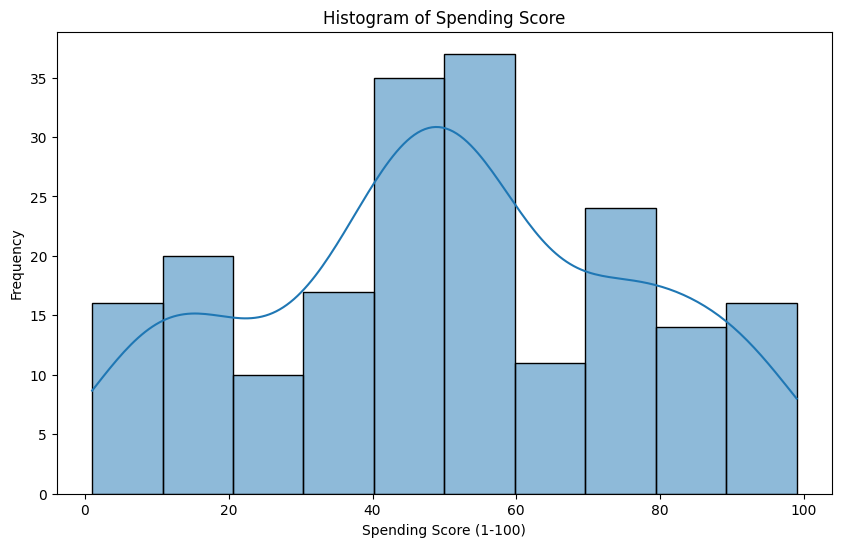

In [20]:
# Plot 1: Histogram of Spending Scores
plt.figure(figsize=(10, 6))
sns.histplot(data['Spending Score (1-100)'], bins=10, kde=True)
plt.title('Histogram of Spending Score')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Frequency')
plt.show()

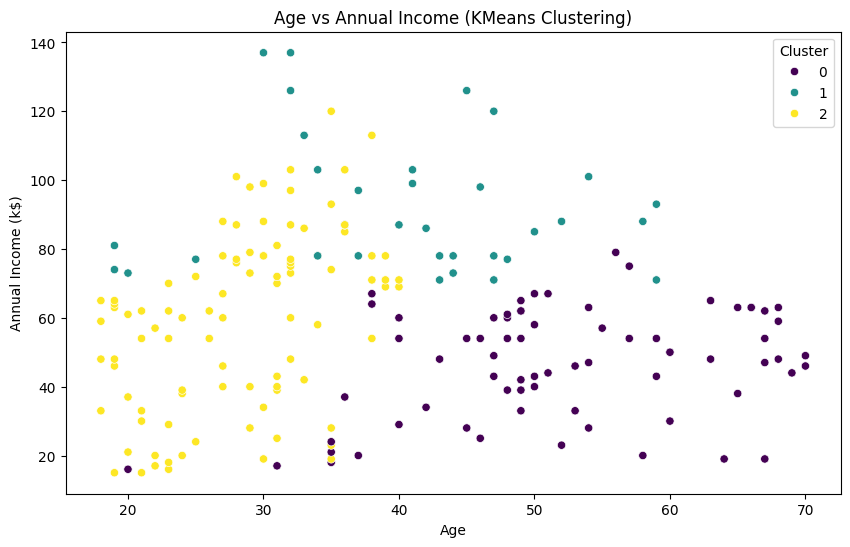

In [21]:
# Plot 2: Scatter plot of Age vs Annual Income with cluster colors
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Age'], y=data['Annual Income (k$)'], hue=data['Cluster'], palette='viridis')
plt.title('Age vs Annual Income (KMeans Clustering)')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()

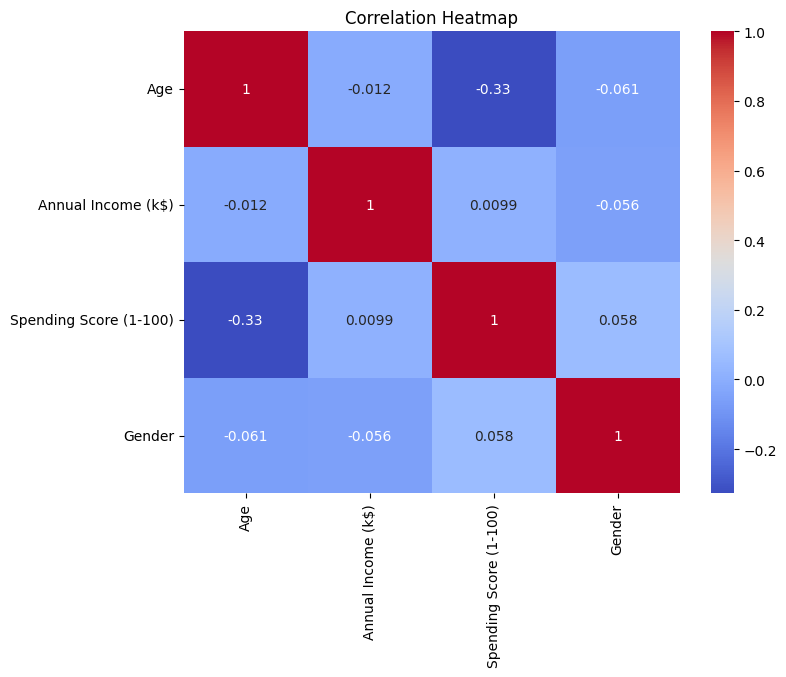

In [22]:
# Plot 3: Heatmap of Correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

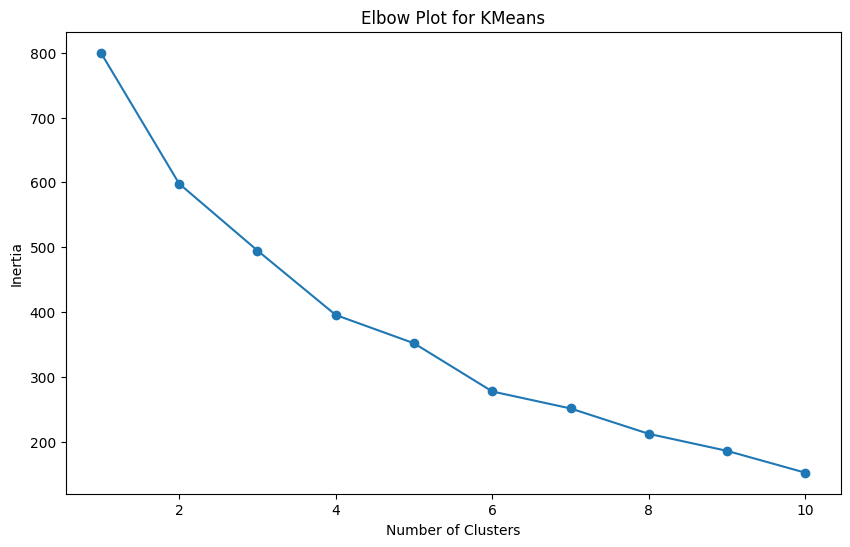

In [23]:
# Plot 4: Elbow plot for K-means clustering
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Plot for KMeans')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

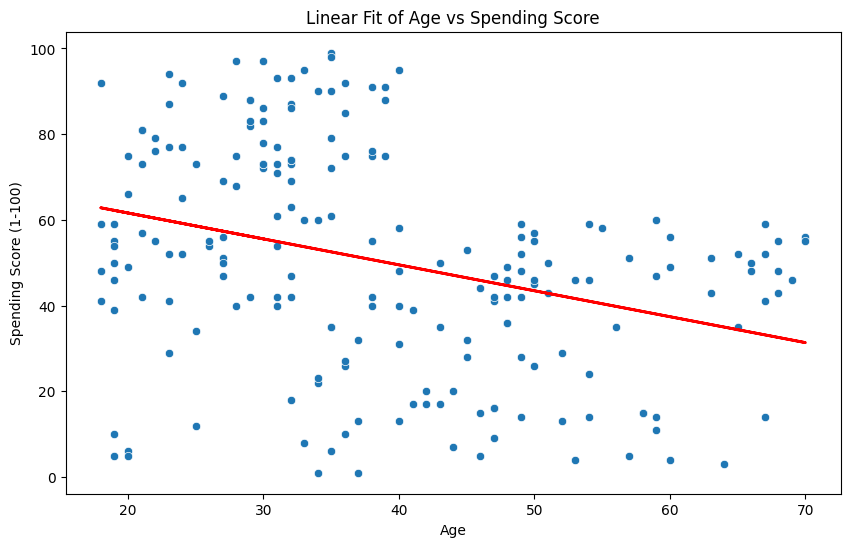

Silhouette Score for KMeans Clustering: 0.25761998051355284


In [24]:
# Line fitting example: Linear regression on Age and Spending Score
X = data[['Age']]
y = data['Spending Score (1-100)']

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Plot 5: Line fit of Age vs Spending Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Age'], y=data['Spending Score (1-100)'])
plt.plot(data['Age'], model.predict(X), color='red', linewidth=2)
plt.title('Linear Fit of Age vs Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

# Silhouette Score for clustering
sil_score = silhouette_score(X_scaled, data['Cluster'])
print(f'Silhouette Score for KMeans Clustering: {sil_score}')